# Clock view of policy 

In [1]:
import numpy as np
from stable_baselines3 import PPO
# 加载模型
model = PPO.load("../output/checkpoints/default_8/put_back_v1_7040000_steps.zip")
visibility_radius = 10.0

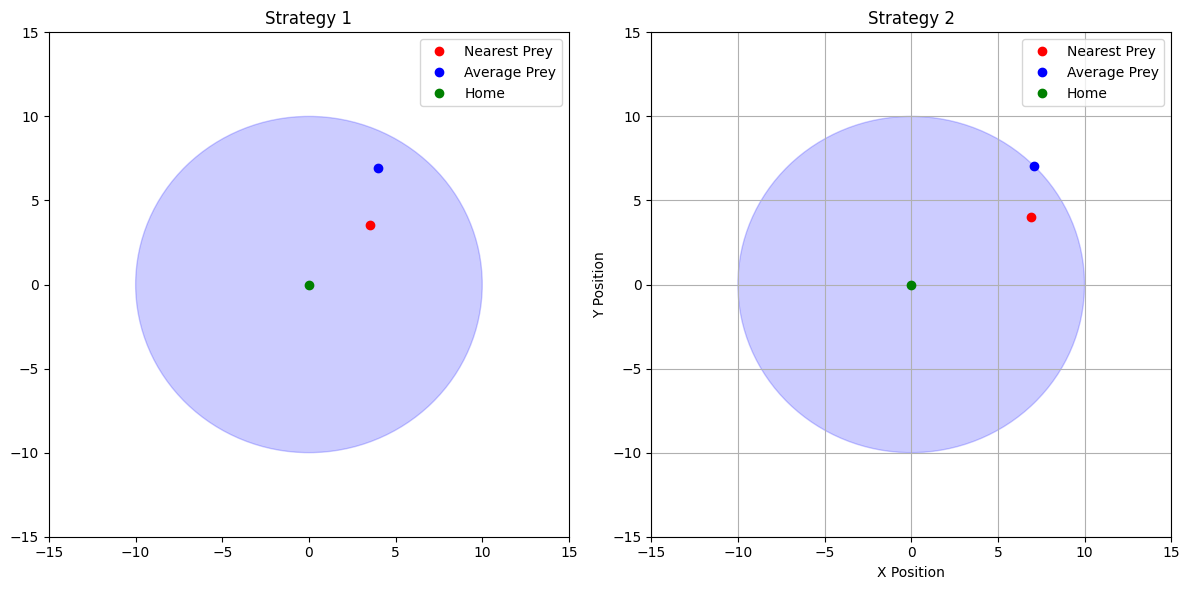

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_strategy(r1, r2, R, theta1, theta2, visibility_radius=10.0, ax = None):
    """
    Plot the strategy visualization for a single set of parameters.

    Parameters:
        r1 (float): Distance to the nearest prey.
        r2 (float): Distance from home.
        R (float): Average distance to prey.
        theta1 (float): Angle to the nearest prey (in radians).
        theta2 (float): Angle to the average prey (in radians).
        visibility_radius (float, optional): Visibility radius of the agent. Defaults to 10.0.
    """
    if ax is None:
        # Create figure and axis
        fig, ax = plt.subplots()
    
    # Plot agent's visibility radius
    visibility_circle = plt.Circle((0, 0), visibility_radius, color='blue', alpha=0.2)
    ax.add_artist(visibility_circle)

    # Plot nearest prey position
    prey1_x = r1 * np.cos(theta1)
    prey1_y = r1 * np.sin(theta1)
    ax.plot(prey1_x, prey1_y, 'ro', label='Nearest Prey')

    # Plot average prey position
    prey2_x = R * np.cos(theta2)
    prey2_y = R * np.sin(theta2)
    ax.plot(prey2_x, prey2_y, 'bo', label='Average Prey')

    # Plot home position
    ax.plot(0, 0, 'go', label='Home')

    # Set axis limits
    ax.set_xlim(-visibility_radius - 5, visibility_radius + 5)
    ax.set_ylim(-visibility_radius - 5, visibility_radius + 5)

    # Add legend
    ax.legend()

    # Show plot
    plt.title('Agent Strategy Visualization')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    # plt.show()

def plot_multiple_strategies(params_list, visibility_radius=10.0):
    """
    Plot the strategy visualization for multiple sets of parameters.

    Parameters:
        params_list (list of tuples): List of tuples containing parameters (r1, r2, R, theta1, theta2).
        visibility_radius (float, optional): Visibility radius of the agent. Defaults to 10.0.
    """
    num_plots = len(params_list)
    fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 6, 6))

    for i, params in enumerate(params_list):
        ax = axs[i] if num_plots > 1 else axs
        plot_strategy(*params, visibility_radius=visibility_radius, ax=ax)
        ax.set_title(f'Strategy {i+1}')

    plt.tight_layout()
    plt.show()

# Test the functions
# Test plot_strategy function
# plot_strategy(5, 10, 8, np.pi/4, np.pi/3)

# Test plot_multiple_strategies function
params_list = [(5, 10, 8, np.pi/4, np.pi/3), (8, 12, 10, np.pi/6, np.pi/4)]
plot_multiple_strategies(params_list)


# MSD

In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('data/trajectories_put_back_0_smart_5000.csv')

# 按trajectory_id分组,并统计每个轨迹结束时间中最小的time
min_max_time = df.groupby('trajectory_id')['time'].max().min()

# 打印结果
print(min_max_time)
df_clean = df[df['time'] <= min_max_time].copy()

362


In [3]:
df_clean.loc[:, 'displacement_squared'] = (df_clean['x']**2 + df_clean['y']**2)

In [4]:
# 按时间分组并计算平均平方位移
msd = df_clean.groupby('time')['displacement_squared'].mean().reset_index()

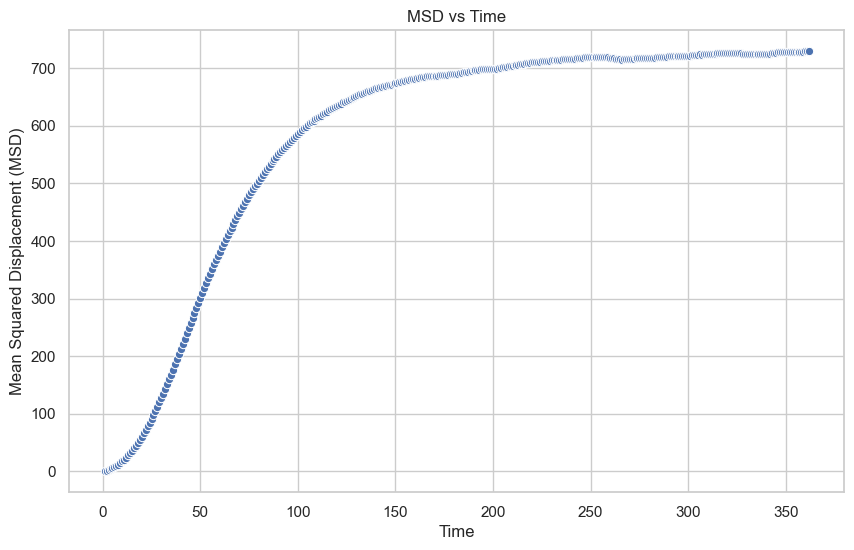

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用Seaborn绘制图表
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=msd, x='time', y='displacement_squared', marker='o')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs Time')
plt.show()

# Distribution

In [15]:
# 选几个t List 对同一个t 中每个id由x y计算r 统计r的分布,绘制图像
times = range(0, 300, 5)
df_clean.loc[:, 'r'] = (df_clean['x']**2 + df_clean['y']**2)**0.5

In [16]:
filtered_data = df_clean[df_clean['time'].isin(times)]

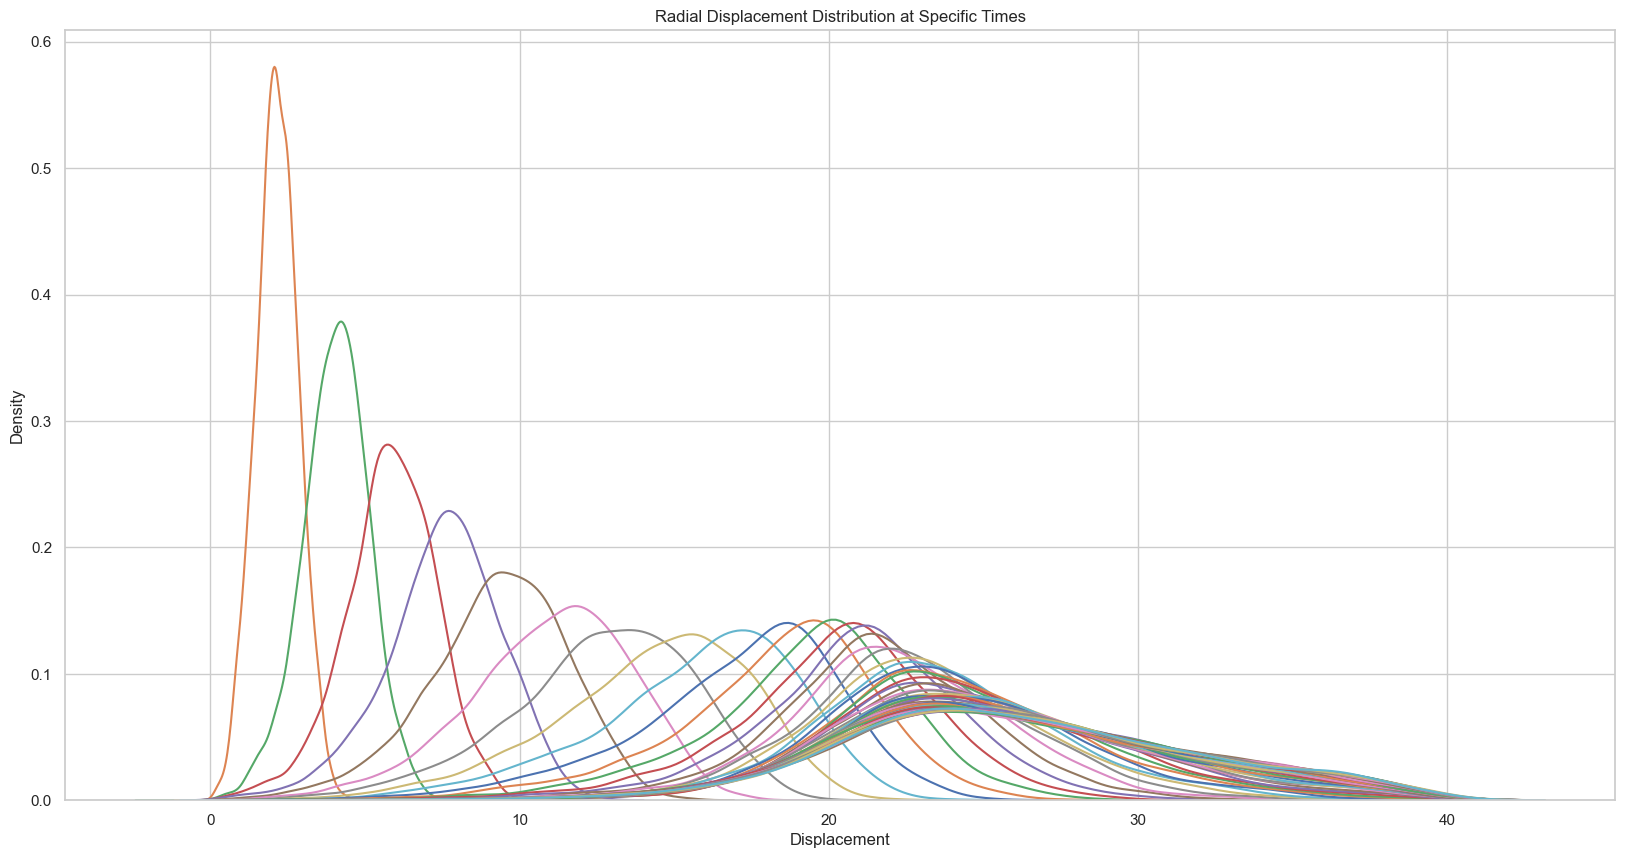

In [21]:
# 绘制径向位移分布图
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
for time_point in times:
    subset = filtered_data[filtered_data['time'] == time_point]
    sns.kdeplot(subset['r'], label=f'Time {time_point}')
plt.xlabel('Displacement')
plt.ylabel('Density')
plt.title('Radial Displacement Distribution at Specific Times')
# plt.legend()
plt.show()